In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
supermarket_data = pd.read_csv("supermarket_sales - Sheet1.csv", index_col=0)

In [3]:
supermarket_data.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
# choose features, create datetime
supermarket_data = pd.read_csv(
    'supermarket_sales - Sheet1.csv',
    usecols=[
        'Invoice ID',
        'City',
        'Customer type',
        'Gender',
        'Product line',
        'Unit price',
        'Quantity',
        'Payment',
        'Rating',
        'Date',
        'Time'
    ],
    parse_dates= {'sale_time': ['Date', 'Time']}
)

# engineer gross sales feature
supermarket_data['sale_gross'] = round(
    supermarket_data['Unit price'] * supermarket_data['Quantity'],
    2
)

# rename columns
supermarket_data = supermarket_data.rename(
    columns={
        'Invoice ID': 'invoice',
        'City': 'branch',
        'Customer type': 'member',
        'Gender': 'gender',
        'Product line': 'product_category',
        'Unit price': 'unit_price',
        'Quantity': 'quantity',
        'Payment': 'payment_type',
        'Rating': 'rating'
    }
)

# set index
supermarket_data.set_index('invoice', inplace=True)

# sort values
supermarket_data.sort_values(by=['sale_time'], inplace=True)

In [5]:
# verify changes
supermarket_data.head()

,sale_time,branch,member,gender,product_category,unit_price,quantity,payment_type,rating,sale_gross
invoice,,,,,,,,,,
765-26-6951,2019-01-01 10:39:00,Yangon,Normal,Male,Sports and travel,72.61,6,Credit card,6.9,435.66
746-04-1077,2019-01-01 11:36:00,Mandalay,Member,Female,Food and beverages,84.63,10,Credit card,9.0,846.30
271-77-8740,2019-01-01 11:40:00,Naypyitaw,Member,Female,Sports and travel,29.22,6,Ewallet,5.0,175.32
133-14-7229,2019-01-01 11:43:00,Naypyitaw,Normal,Male,Health and beauty,62.87,2,Cash,5.0,125.74
651-88-7328,2019-01-01 13:55:00,Yangon,Normal,Female,Fashion accessories,65.74,9,Cash,7.7,591.66


In [6]:
# confirm changes did not affect total observations
supermarket_data.shape

(1000, 10)

In [7]:
# confirm datatypes for transfer to dashboard / report
supermarket_data.dtypes

sale_time           datetime64[ns]
branch                      object
member                      object
gender                      object
product_category            object
unit_price                 float64
quantity                     int64
payment_type                object
rating                     float64
sale_gross                 float64
dtype: object

In [8]:
# convert to csv
# supermarket_data.to_csv("supermarket_sales_modified.csv")

In [9]:
sns.set_theme()
sns.set_style('darkgrid')

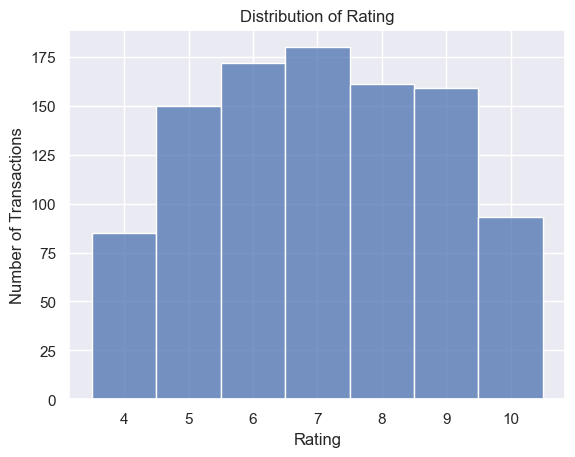

In [10]:
# distribution of rating
sns.histplot(
    data= supermarket_data,
    x= 'rating',
    discrete= True
)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Transactions');

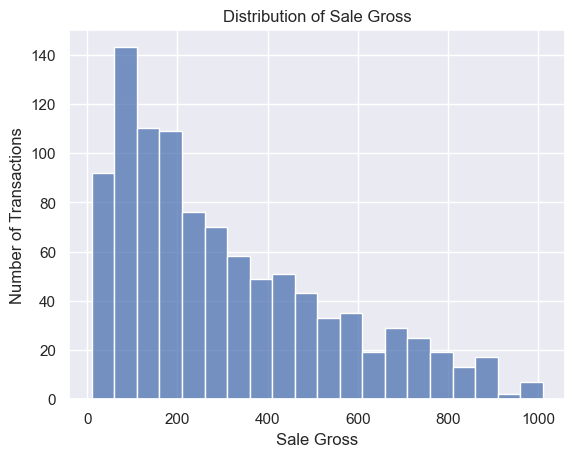

In [11]:
# distribution of sale amount
sns.histplot(
    data= supermarket_data,
    x= 'sale_gross',
    binwidth= 50.0
)
plt.title('Distribution of Sale Gross')
plt.xlabel('Sale Gross')
plt.ylabel('Number of Transactions');

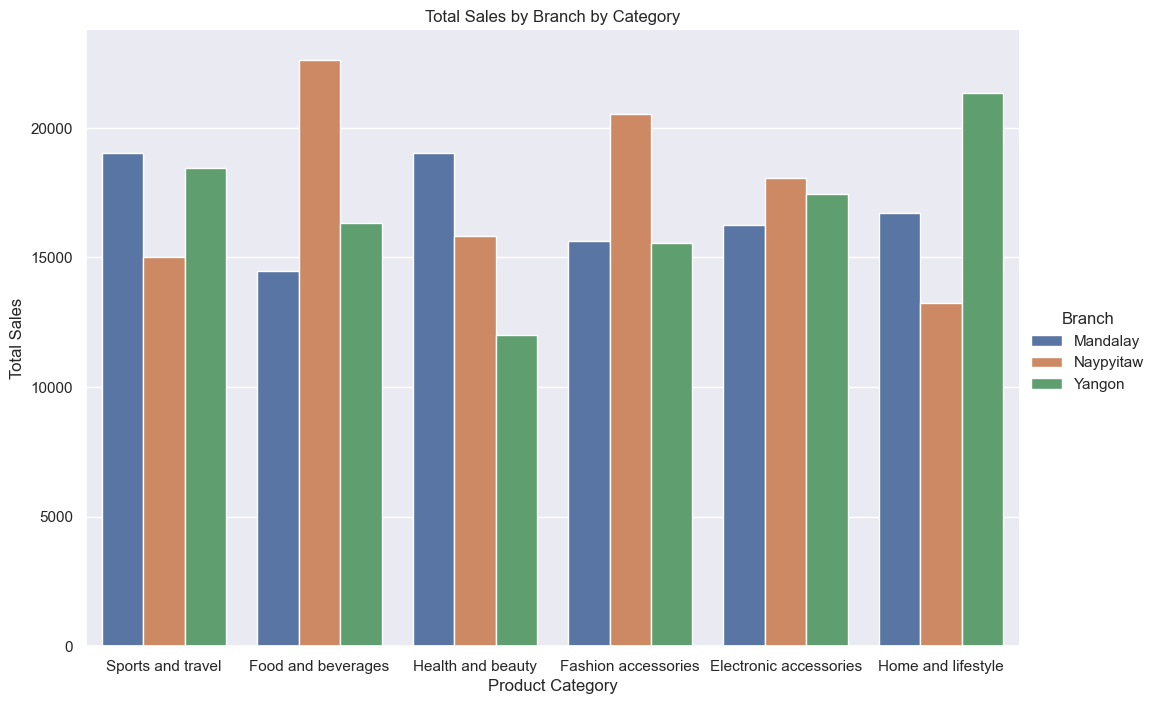

In [12]:
# total sales by branch by category
g = sns.catplot(
    data= supermarket_data,
    x= 'product_category',
    y= 'sale_gross',
    hue= 'branch',
    kind= 'bar',
    orient= 'vertical',
    estimator= 'sum',
    errorbar= None,
    height= 7,
    aspect= 12/8,
    hue_order=[
        'Mandalay',
        'Naypyitaw',
        'Yangon'
    ],
    palette= sns.color_palette(
        'deep'
    )
)
g._legend.set_title('Branch')
plt.title('Total Sales by Branch by Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales');

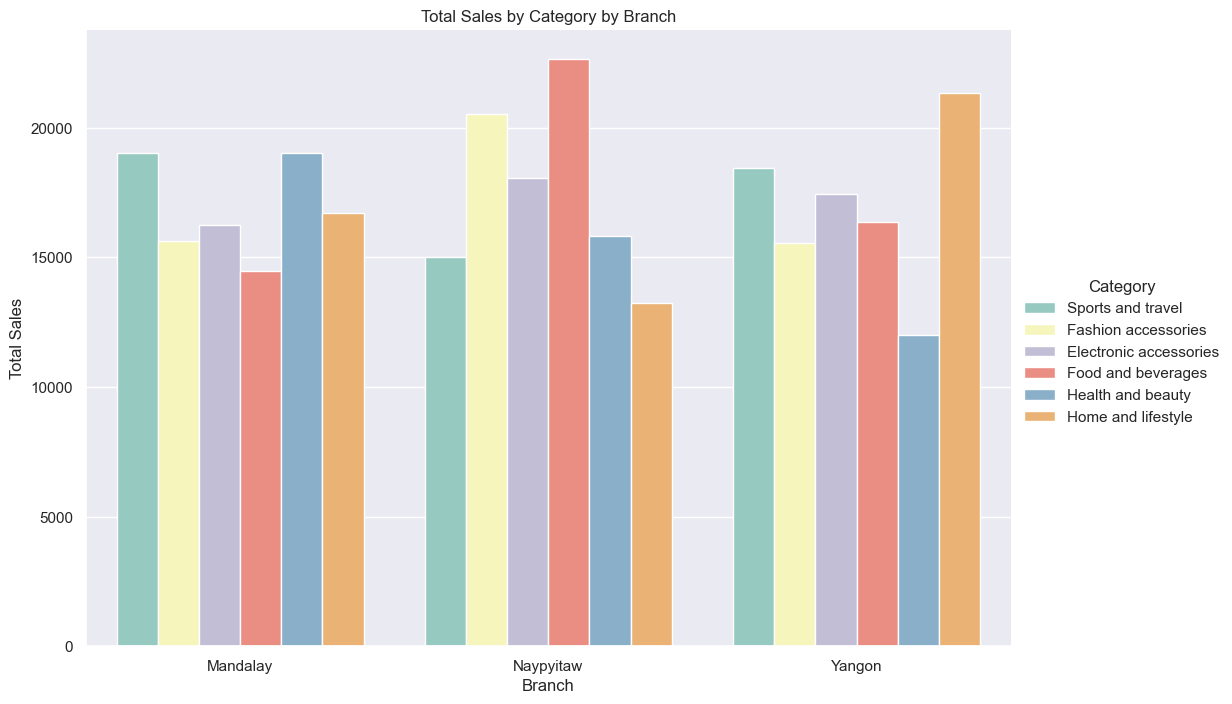

In [13]:
# total sales by category by branch
g = sns.catplot(
    data= supermarket_data,
    x= 'branch',
    y= 'sale_gross',
    hue= 'product_category',
    kind= 'bar',
    orient= 'vertical',
    estimator= 'sum',
    errorbar= None,
    height= 7,
    aspect= 12/8,
    order= [
        'Mandalay',
        'Naypyitaw',
        'Yangon'
    ],
    hue_order=[
        'Sports and travel',
        'Fashion accessories',
        'Electronic accessories',
        'Food and beverages',
        'Health and beauty',
        'Home and lifestyle'
    ],
    palette= sns.color_palette(
        'Set3', 6
    )
)
g._legend.set_title('Category')
plt.title('Total Sales by Category by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Sales');

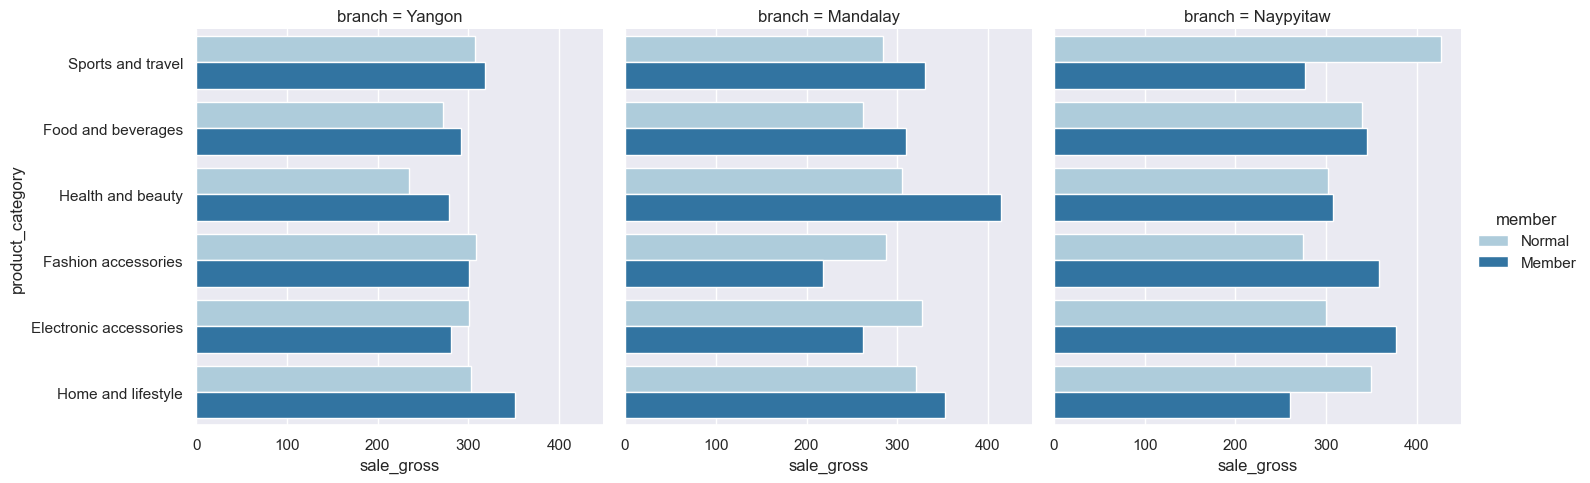

In [14]:
# average sale gross, by member, by category, by branch
g = sns.catplot(
    data= supermarket_data,
    y= 'product_category',
    hue= 'member',
    x= 'sale_gross',
    estimator= 'mean',
    col= 'branch',
    kind= 'bar',
    errorbar= None,
    palette= sns.color_palette(
        'Paired', 2
    )
)